In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_moons

In [15]:
x,y = make_moons(n_samples=1000,noise=0.2)

In [16]:
df = {"x1":x[:,0],"x2":x[:,1],"y":y}

In [17]:
dataset = pd.DataFrame(df)

<Axes: xlabel='x1', ylabel='x2'>

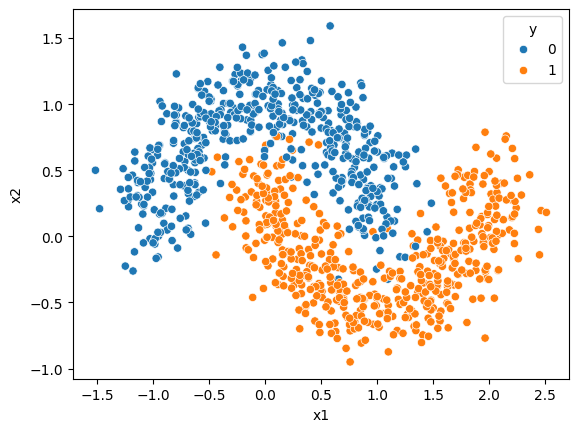

In [18]:
sns.scatterplot(x = "x1",y = "x2",data = dataset,hue="y")

In [19]:
x = dataset.iloc[:,:-1]
y = dataset["y"]

In [20]:
from sklearn.model_selection import train_test_split

In [23]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [28]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [31]:
dt.score(x_train,y_train) , dt.score(x_test,y_test)

(1.0, 0.96)

In [32]:
sv = SVC()
sv.fit(x_train,y_train)

SVC()

In [33]:
sv.score(x_train,y_train) , sv.score(x_test,y_test)

(0.975, 0.975)

In [34]:
gnb = GaussianNB()
gnb.fit(x_train,y_train)

GaussianNB()

In [35]:
gnb.score(x_train,y_train) , gnb.score(x_test,y_test)

(0.8725, 0.885)

In [36]:
from sklearn.ensemble import VotingClassifier

In [38]:
li = [("dt1",DecisionTreeClassifier()),("sv1",SVC()),("gnb1",GaussianNB())]

In [44]:
vc = VotingClassifier(li)
vc.fit(x_train,y_train)

VotingClassifier(estimators=[('dt1', DecisionTreeClassifier()), ('sv1', SVC()),
                             ('gnb1', GaussianNB())])

In [45]:
vc.score(x_train,y_train),vc.score(x_test,y_test)

(0.98125, 0.975)

In [50]:
prd = {"dt":dt.predict(x_test),"svm":sv.predict(x_test),"gnb":gnb.predict(x_test),"vc":vc.predict(x_test)}

In [51]:
pd.DataFrame(prd)

,dt,svm,gnb,vc
0,0,0,0,0
1,1,1,1,1
2,1,1,1,1
3,0,0,0,0
4,1,1,1,1
...,...,...,...,...
195,0,0,0,0
196,0,0,0,0
197,1,1,1,1
198,1,1,1,1
